In [ ]:
##Community 3
import re

def process_data(input_text):
    letters = []
    
    # Extract only letters, removing spaces
    for line in input_text.split("\n"):
        letters.extend(list(line.replace(" ", "")))  

    # Split into chunks of 60 characters each
    rows = [letters[i:i+60] for i in range(0, len(letters), 60)]

    # Print as Python matrix
    print("[")
    for row in rows:
        print("    [{}],".format(", ".join(repr(item) for item in row)))
    print("]")

    # Print dimensions
    num_rows = len(rows)
    max_cols = max(len(row) for row in rows) if rows else 0
    print(f"\nMatrix Dimensions: {num_rows} x {max_cols}")

# Example Input Data (Replace this with your actual data)
input_text = """

EAA F BDCDAB CDACBAK J F B FAACA EAHMAD F H L BGANG EAA HCACB BGDCA J B I OC I BC B B B J F F H BGBA I ADC F BMAAAB BAGD J BCRABAB E KDACADACD FA FAAADCAABAAH BD AC J C E J BCBAGMT CCCNDDOR J B F CMBDCGA F F F B B EAB BAGC FAB F F N KOCCBA J BR J C ABCDDADAA HD E I A E I F D B B B EA E KAC EAADACAAC F HHABAGABA EAC E H E BDAB BG BA C ECDA B BM F EACCAA E HBA L BA J EG I BA CD H B FABAAA F DCB B D EAC FAA I AACADCA I C CCB I CADAGG F DB P BAKB E BC E BCB BDMAGA EADDACNA HMCK HA E CB E FACAACH BAB C CDAC FCAPA LGBACA J AACD E H BAB B E I BCHACDACAGACB CBA LAB D BG SDABCCCD KA BDCAPAA E E EANAAB E J K B B B BDG BABAGABAC FC FCMD CADCE CDNB DGA EC EGAA EA I BA E B FAACACCADB BAB E HCG B E J BD EAGAB E L G L EGB FACG EA F CB E B EC ECCCCG B BE H BGCB HADAA J AGGDACBAAB HA FG J B FABGQACCBMA F E FAABAQB CK EAB B BCGA FDD DD J AAB BDAB CA F RB I DB CABCA F DABAKAB J BCBCBGCGAB C FOAD E DDA EG FAAGCGA B EAA FC J CB DAA FAB BABGAA I AAB BAHCAGBDA F J B F B CADADADDDA AG F JAG BAA EA DAACB PB J HDB BGGBAD H L H BAABA F B I A E BACKBAGAKADCB B J AAAMGDDAAAHAC FD BAABAAAAAA F D I OCGB CDDACAAD HCBAP BDCAB BCBADAAD E CE C D BAD BA E LACD BA CB F KDAGB BE BG HADK I A F FAB HCB FE J I ACDA ECCDGC HACB E CE DAAB LAACGCCABC DCB B FA E HAAGAOAAABA BGADAGCA I ABE BCM F B J B B B I BADBADB FGC I E HA EABA I A B BDC ECB BAGABA E B HBAAC E BDB F EADA I AACDAB B EL BADA HDCGKABDDDCDD B FDA E EACADAC I A E J DAF E FEE B FA EBB ECAABDCKD BDACADDCB B CEA F BAB E I J F CAD FA G EDC F FDCB E F BA F B F FAD F NE ECAAB B L I AD BAK BCGGCAAAB DCHB F B EA I CB F CB B F B B F BAACH I DB DACEAABADT I CANCACDAGH B BD HADA I LA E CB F B B I BEG BA FBI AA F B F BCCA I GC LA E CCB J AA BCBAB I BGAB E F B BCCABD CACD HB CCE CA B FACH B BCAB BD M FDA FCAC EADA FAGCB EACB EG BDAAABABCB BCCAAAB C I CADCA EA FAHACH BC LAA I BDDAAAC J AKG E NBACB B F HCQB B B F L I DP BC F BDB CCD I CA HCAA FADAAAC ECACCB E EDDG J DAKACDCJ HAAAN B HAG KB EAB H P BDAD SGCAANGBAB CAB B BCCAGCBACG EC DAADCDACCB H J F BGAA A BGCKBDD EABDGCB HCAD I EA E EAAABMAB EA I DCB E E BDAA FABCBC J CCDB B CAB CA FACB ECACBADABMC EC F LAACMA E E E HCAB CBCCBCCBCAH B G BABCBD KAA F B C DACA F BAAGD BADABACN BDABD H BAC F CCDP I A J A FAGAA ECB BGB B B EC E H BD DB EAB DD EAAA E BAB BC ECDCBA FGB L CA J DAACAAACB DABC FAAC LA LB B E B CCB I J D DAB CCACAGA F DDAHAAB BCD B ECAB B P I AB BDB D HBA FA BCA E BC EGD BAD H EN LMB L KB CCCD E E CB CE H B I ABN J FGCB E E BA I E BG E DA J J A E B DAABDD I DA FG F EG FEE FCHAADDDBAGAAG F B KB EAAGAC E BD BAG I ED I AB CAB EGADAB EG B I AADAABAD EABAA EAA F KOB CAG I D F CH F C J BABAC I A LAC EACA F FAGD J D HG HC E H B BCGAAACB H ABD B FAD F B FAABACE BG B F H B BCD HDDG BA J CCB EBB B B B CDG J ADB H BE ECACB L BGA CK CBCAB H J D EADAA F D J E BAHCAA EDC JDB E EACHCKCAD E E BE D J FG B B BAACBC ECD D E EAACHAAAB HA F HA E DH SCABDD BAAAACA I ABGB F B B F FE BE C FAAACKO FABACBA DDD E B BAABAAA FAAAACAA EC I FF BC FAAB E K EAA EAB HDBAA EA I A J AADAA EGGCCG CACA E FC F BACCAGG E BA FABAAABGDAMB EAD EBB B FAAAA HAB J B CB B KAD ECG FDAC C D BCQ I AACE EADB BE BA BGDD E B EC I D BCACP BGAACCB HBAACC FA F DOKBDD BEE H B I D B HCAD B BA FAB DCAB B BAO ECAACCBD HAH L BCB BAACCCAB BA EA E I CA E HA FAAB H AB HA E CGCB CAB B D I MB EAADG BD E BD BAOAHADCKB CQAB L I B HDADABAD B HMAC FAA C EAD H F BA E CAD FADBG E BAAAC I EAHAAA I CN F I CA DDA EADCB F DCCBC L CCCD B B BD D I H ED JDE D ADDC AB CDAAD F C DACBDCD BAGA E FAACAA F CB DB BE B ECDD B B BCC F EA D BCBOAMB I A FACJ L L D EA F FACB F B BAB FDAD F BDC FCA E DB DG F I BMACBAGDAACKD CADACA FACA B B DF CAA LACANCD ED F D BAA FOB HDACBAA HCBAKG HAH B S KAAAACGB B HOD B BE B F B CAB E C F J D EAAKBD BA F CG J CB BDN FD BDABAAD E DB CB BACNAKCBCAB ACCHABAD CB BMDBABG F C F BA EDD B F CCGCCA EA I ACA L DACCHBAB FAA EAAADDA E F BD TAGB BC F B C E F B L LAB C EAAGCA EA E H FCD K EGC F HAMABAD E CAGARCB FMHGAAB B BEE BCD I B DF DAA FGB DA EL BGAABCA E HGD BAAAA EA F JAB KCAB B EAAABCACK FCG E DCDCDD BE BAGB J J G HAA B F BGAABD B HDAB J A F B BE BA I F E I E B BAB J H B B F BAD BQKC B B KBCCB I ICE DAAB EGDA EM HAAB LAAC I BA FEC E FA FAB CC I A I DGD BEE F BABAAAA H LABAB E EA AAD I ADAGADCA E F I A EA EAD BABABCCDGCD E B F HDBACC I DD HC FEC I E HAD E E B ECDB I J B CDBA H F DCGCB E BAA J AKBAGG E BACKCC LA F DDD B J EAGDABA FNA D B ACCCBAG F FAB B CAAACROA EA F DAAB J BA I ABCGDAAB H F DQBA EAABAD ECCDCBN KB BDAGAC EA FADACDBMAD BA ECABABA E F HDC I B B I B FGAB E F CAG BDB B BE EAAABA DGACAA E FACAAA E ACAB CCD B ECBGA EDDAAAAHCAA I B F CIA EAD EA FACKBCACAAC A F BA EC FD J GB CDADDDAC E BABADCDAACDAB B FCCBAB EA EKES CE B BCDAB E HD BCC C DA E EDAB FE DF CAACGADGC L E FAC F FABGPABAB H BAAAKCDA HG F B EAABMA ED H BC AA D BD J BC HCC I BADCAA BABC EBB FACRD BDDGAD H FCAC LAAB DACG KCBGOCA I J CA AC EAB BD BAAD E EAQAAB F D BAB F B HDDD B B BCCABC I B BAAAB CABA J E I BAAB I CD FA CCCAD FNACB B DBM EG J AAGAAAPTQ I GA E K ECCA J CMCAA E D HAABA H HCAB B J B KDC E 



"""

process_data(input_text)


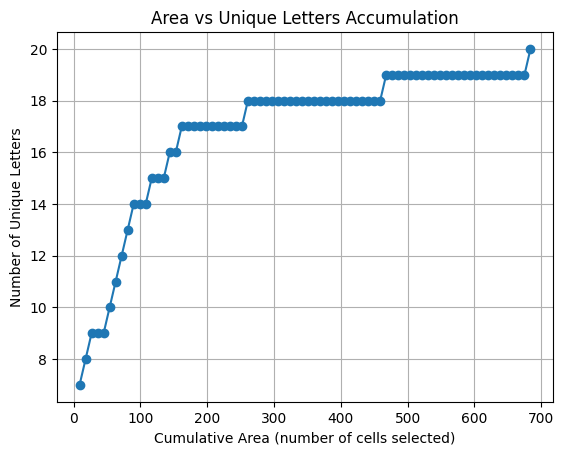

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Generate a 60×60 matrix of random letters (words)
matrix = [
    ['E', 'A', 'A', 'F', 'B', 'D', 'C', 'D', 'A', 'B', 'C', 'D', 'A', 'C', 'B', 'A', 'K', 'J', 'F', 'B', 'F', 'A', 'A', 'C', 'A', 'E', 'A', 'H', 'M', 'A', 'D', 'F', 'H', 'L', 'B', 'G', 'A', 'N', 'G', 'E', 'A', 'A', 'H', 'C', 'A', 'C', 'B', 'B', 'G', 'D', 'C', 'A', 'J', 'B', 'I', 'O', 'C', 'I', 'B', 'C'],
    ['B', 'B', 'B', 'J', 'F', 'F', 'H', 'B', 'G', 'B', 'A', 'I', 'A', 'D', 'C', 'F', 'B', 'M', 'A', 'A', 'A', 'B', 'B', 'A', 'G', 'D', 'J', 'B', 'C', 'R', 'A', 'B', 'A', 'B', 'E', 'K', 'D', 'A', 'C', 'A', 'D', 'A', 'C', 'D', 'F', 'A', 'F', 'A', 'A', 'A', 'D', 'C', 'A', 'A', 'B', 'A', 'A', 'H', 'B', 'D'],
    ['A', 'C', 'J', 'C', 'E', 'J', 'B', 'C', 'B', 'A', 'G', 'M', 'T', 'C', 'C', 'C', 'N', 'D', 'D', 'O', 'R', 'J', 'B', 'F', 'C', 'M', 'B', 'D', 'C', 'G', 'A', 'F', 'F', 'F', 'B', 'B', 'E', 'A', 'B', 'B', 'A', 'G', 'C', 'F', 'A', 'B', 'F', 'F', 'N', 'K', 'O', 'C', 'C', 'B', 'A', 'J', 'B', 'R', 'J', 'C'],
    ['A', 'B', 'C', 'D', 'D', 'A', 'D', 'A', 'A', 'H', 'D', 'E', 'I', 'A', 'E', 'I', 'F', 'D', 'B', 'B', 'B', 'E', 'A', 'E', 'K', 'A', 'C', 'E', 'A', 'A', 'D', 'A', 'C', 'A', 'A', 'C', 'F', 'H', 'H', 'A', 'B', 'A', 'G', 'A', 'B', 'A', 'E', 'A', 'C', 'E', 'H', 'E', 'B', 'D', 'A', 'B', 'B', 'G', 'B', 'A'],
    ['C', 'E', 'C', 'D', 'A', 'B', 'B', 'M', 'F', 'E', 'A', 'C', 'C', 'A', 'A', 'E', 'H', 'B', 'A', 'L', 'B', 'A', 'J', 'E', 'G', 'I', 'B', 'A', 'C', 'D', 'H', 'B', 'F', 'A', 'B', 'A', 'A', 'A', 'F', 'D', 'C', 'B', 'B', 'D', 'E', 'A', 'C', 'F', 'A', 'A', 'I', 'A', 'A', 'C', 'A', 'D', 'C', 'A', 'I', 'C'],
    ['C', 'C', 'B', 'I', 'C', 'A', 'D', 'A', 'G', 'G', 'F', 'D', 'B', 'P', 'B', 'A', 'K', 'B', 'E', 'B', 'C', 'E', 'B', 'C', 'B', 'B', 'D', 'M', 'A', 'G', 'A', 'E', 'A', 'D', 'D', 'A', 'C', 'N', 'A', 'H', 'M', 'C', 'K', 'H', 'A', 'E', 'C', 'B', 'E', 'F', 'A', 'C', 'A', 'A', 'C', 'H', 'B', 'A', 'B', 'C'],
    ['C', 'D', 'A', 'C', 'F', 'C', 'A', 'P', 'A', 'L', 'G', 'B', 'A', 'C', 'A', 'J', 'A', 'A', 'C', 'D', 'E', 'H', 'B', 'A', 'B', 'B', 'E', 'I', 'B', 'C', 'H', 'A', 'C', 'D', 'A', 'C', 'A', 'G', 'A', 'C', 'B', 'C', 'B', 'A', 'L', 'A', 'B', 'D', 'B', 'G', 'S', 'D', 'A', 'B', 'C', 'C', 'C', 'D', 'K', 'A'],
    ['B', 'D', 'C', 'A', 'P', 'A', 'A', 'E', 'E', 'E', 'A', 'N', 'A', 'A', 'B', 'E', 'J', 'K', 'B', 'B', 'B', 'B', 'D', 'G', 'B', 'A', 'B', 'A', 'G', 'A', 'B', 'A', 'C', 'F', 'C', 'F', 'C', 'M', 'D', 'C', 'A', 'D', 'C', 'E', 'C', 'D', 'N', 'B', 'D', 'G', 'A', 'E', 'C', 'E', 'G', 'A', 'A', 'E', 'A', 'I'],
    ['B', 'A', 'E', 'B', 'F', 'A', 'A', 'C', 'A', 'C', 'C', 'A', 'D', 'B', 'B', 'A', 'B', 'E', 'H', 'C', 'G', 'B', 'E', 'J', 'B', 'D', 'E', 'A', 'G', 'A', 'B', 'E', 'L', 'G', 'L', 'E', 'G', 'B', 'F', 'A', 'C', 'G', 'E', 'A', 'F', 'C', 'B', 'E', 'B', 'E', 'C', 'E', 'C', 'C', 'C', 'C', 'G', 'B', 'B', 'E'],
    ['H', 'B', 'G', 'C', 'B', 'H', 'A', 'D', 'A', 'A', 'J', 'A', 'G', 'G', 'D', 'A', 'C', 'B', 'A', 'A', 'B', 'H', 'A', 'F', 'G', 'J', 'B', 'F', 'A', 'B', 'G', 'Q', 'A', 'C', 'C', 'B', 'M', 'A', 'F', 'E', 'F', 'A', 'A', 'B', 'A', 'Q', 'B', 'C', 'K', 'E', 'A', 'B', 'B', 'B', 'C', 'G', 'A', 'F', 'D', 'D'],
    ['D', 'D', 'J', 'A', 'A', 'B', 'B', 'D', 'A', 'B', 'C', 'A', 'F', 'R', 'B', 'I', 'D', 'B', 'C', 'A', 'B', 'C', 'A', 'F', 'D', 'A', 'B', 'A', 'K', 'A', 'B', 'J', 'B', 'C', 'B', 'C', 'B', 'G', 'C', 'G', 'A', 'B', 'C', 'F', 'O', 'A', 'D', 'E', 'D', 'D', 'A', 'E', 'G', 'F', 'A', 'A', 'G', 'C', 'G', 'A'],
    ['B', 'E', 'A', 'A', 'F', 'C', 'J', 'C', 'B', 'D', 'A', 'A', 'F', 'A', 'B', 'B', 'A', 'B', 'G', 'A', 'A', 'I', 'A', 'A', 'B', 'B', 'A', 'H', 'C', 'A', 'G', 'B', 'D', 'A', 'F', 'J', 'B', 'F', 'B', 'C', 'A', 'D', 'A', 'D', 'A', 'D', 'D', 'D', 'A', 'A', 'G', 'F', 'J', 'A', 'G', 'B', 'A', 'A', 'E', 'A'],
    ['D', 'A', 'A', 'C', 'B', 'P', 'B', 'J', 'H', 'D', 'B', 'B', 'G', 'G', 'B', 'A', 'D', 'H', 'L', 'H', 'B', 'A', 'A', 'B', 'A', 'F', 'B', 'I', 'A', 'E', 'B', 'A', 'C', 'K', 'B', 'A', 'G', 'A', 'K', 'A', 'D', 'C', 'B', 'B', 'J', 'A', 'A', 'A', 'M', 'G', 'D', 'D', 'A', 'A', 'A', 'H', 'A', 'C', 'F', 'D'],
    ['B', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'F', 'D', 'I', 'O', 'C', 'G', 'B', 'C', 'D', 'D', 'A', 'C', 'A', 'A', 'D', 'H', 'C', 'B', 'A', 'P', 'B', 'D', 'C', 'A', 'B', 'B', 'C', 'B', 'A', 'D', 'A', 'A', 'D', 'E', 'C', 'E', 'C', 'D', 'B', 'A', 'D', 'B', 'A', 'E', 'L', 'A', 'C', 'D', 'B', 'A'],
    ['C', 'B', 'F', 'K', 'D', 'A', 'G', 'B', 'B', 'E', 'B', 'G', 'H', 'A', 'D', 'K', 'I', 'A', 'F', 'F', 'A', 'B', 'H', 'C', 'B', 'F', 'E', 'J', 'I', 'A', 'C', 'D', 'A', 'E', 'C', 'C', 'D', 'G', 'C', 'H', 'A', 'C', 'B', 'E', 'C', 'E', 'D', 'A', 'A', 'B', 'L', 'A', 'A', 'C', 'G', 'C', 'C', 'A', 'B', 'C'],
    ['D', 'C', 'B', 'B', 'F', 'A', 'E', 'H', 'A', 'A', 'G', 'A', 'O', 'A', 'A', 'A', 'B', 'A', 'B', 'G', 'A', 'D', 'A', 'G', 'C', 'A', 'I', 'A', 'B', 'E', 'B', 'C', 'M', 'F', 'B', 'J', 'B', 'B', 'B', 'I', 'B', 'A', 'D', 'B', 'A', 'D', 'B', 'F', 'G', 'C', 'I', 'E', 'H', 'A', 'E', 'A', 'B', 'A', 'I', 'A'],
    ['B', 'B', 'D', 'C', 'E', 'C', 'B', 'B', 'A', 'G', 'A', 'B', 'A', 'E', 'B', 'H', 'B', 'A', 'A', 'C', 'E', 'B', 'D', 'B', 'F', 'E', 'A', 'D', 'A', 'I', 'A', 'A', 'C', 'D', 'A', 'B', 'B', 'E', 'L', 'B', 'A', 'D', 'A', 'H', 'D', 'C', 'G', 'K', 'A', 'B', 'D', 'D', 'D', 'C', 'D', 'D', 'B', 'F', 'D', 'A'],
    ['E', 'E', 'A', 'C', 'A', 'D', 'A', 'C', 'I', 'A', 'E', 'J', 'D', 'A', 'F', 'E', 'F', 'E', 'E', 'B', 'F', 'A', 'E', 'B', 'B', 'E', 'C', 'A', 'A', 'B', 'D', 'C', 'K', 'D', 'B', 'D', 'A', 'C', 'A', 'D', 'D', 'C', 'B', 'B', 'C', 'E', 'A', 'F', 'B', 'A', 'B', 'E', 'I', 'J', 'F', 'C', 'A', 'D', 'F', 'A'],
    ['G', 'E', 'D', 'C', 'F', 'F', 'D', 'C', 'B', 'E', 'F', 'B', 'A', 'F', 'B', 'F', 'F', 'A', 'D', 'F', 'N', 'E', 'E', 'C', 'A', 'A', 'B', 'B', 'L', 'I', 'A', 'D', 'B', 'A', 'K', 'B', 'C', 'G', 'G', 'C', 'A', 'A', 'A', 'B', 'D', 'C', 'H', 'B', 'F', 'B', 'E', 'A', 'I', 'C', 'B', 'F', 'C', 'B', 'B', 'F'],
    ['B', 'B', 'F', 'B', 'A', 'A', 'C', 'H', 'I', 'D', 'B', 'D', 'A', 'C', 'E', 'A', 'A', 'B', 'A', 'D', 'T', 'I', 'C', 'A', 'N', 'C', 'A', 'C', 'D', 'A', 'G', 'H', 'B', 'B', 'D', 'H', 'A', 'D', 'A', 'I', 'L', 'A', 'E', 'C', 'B', 'F', 'B', 'B', 'I', 'B', 'E', 'G', 'B', 'A', 'F', 'B', 'I', 'A', 'A', 'F'],
    ['B', 'F', 'B', 'C', 'C', 'A', 'I', 'G', 'C', 'L', 'A', 'E', 'C', 'C', 'B', 'J', 'A', 'A', 'B', 'C', 'B', 'A', 'B', 'I', 'B', 'G', 'A', 'B', 'E', 'F', 'B', 'B', 'C', 'C', 'A', 'B', 'D', 'C', 'A', 'C', 'D', 'H', 'B', 'C', 'C', 'E', 'C', 'A', 'B', 'F', 'A', 'C', 'H', 'B', 'B', 'C', 'A', 'B', 'B', 'D'],
    ['M', 'F', 'D', 'A', 'F', 'C', 'A', 'C', 'E', 'A', 'D', 'A', 'F', 'A', 'G', 'C', 'B', 'E', 'A', 'C', 'B', 'E', 'G', 'B', 'D', 'A', 'A', 'A', 'B', 'A', 'B', 'C', 'B', 'B', 'C', 'C', 'A', 'A', 'A', 'B', 'C', 'I', 'C', 'A', 'D', 'C', 'A', 'E', 'A', 'F', 'A', 'H', 'A', 'C', 'H', 'B', 'C', 'L', 'A', 'A'],
    ['I', 'B', 'D', 'D', 'A', 'A', 'A', 'C', 'J', 'A', 'K', 'G', 'E', 'N', 'B', 'A', 'C', 'B', 'B', 'F', 'H', 'C', 'Q', 'B', 'B', 'B', 'F', 'L', 'I', 'D', 'P', 'B', 'C', 'F', 'B', 'D', 'B', 'C', 'C', 'D', 'I', 'C', 'A', 'H', 'C', 'A', 'A', 'F', 'A', 'D', 'A', 'A', 'A', 'C', 'E', 'C', 'A', 'C', 'C', 'B'],
    ['E', 'E', 'D', 'D', 'G', 'J', 'D', 'A', 'K', 'A', 'C', 'D', 'C', 'J', 'H', 'A', 'A', 'A', 'N', 'B', 'H', 'A', 'G', 'K', 'B', 'E', 'A', 'B', 'H', 'P', 'B', 'D', 'A', 'D', 'S', 'G', 'C', 'A', 'A', 'N', 'G', 'B', 'A', 'B', 'C', 'A', 'B', 'B', 'B', 'C', 'C', 'A', 'G', 'C', 'B', 'A', 'C', 'G', 'E', 'C'],
    ['D', 'A', 'A', 'D', 'C', 'D', 'A', 'C', 'C', 'B', 'H', 'J', 'F', 'B', 'G', 'A', 'A', 'A', 'B', 'G', 'C', 'K', 'B', 'D', 'D', 'E', 'A', 'B', 'D', 'G', 'C', 'B', 'H', 'C', 'A', 'D', 'I', 'E', 'A', 'E', 'E', 'A', 'A', 'A', 'B', 'M', 'A', 'B', 'E', 'A', 'I', 'D', 'C', 'B', 'E', 'E', 'B', 'D', 'A', 'A'],
    ['F', 'A', 'B', 'C', 'B', 'C', 'J', 'C', 'C', 'D', 'B', 'B', 'C', 'A', 'B', 'C', 'A', 'F', 'A', 'C', 'B', 'E', 'C', 'A', 'C', 'B', 'A', 'D', 'A', 'B', 'M', 'C', 'E', 'C', 'F', 'L', 'A', 'A', 'C', 'M', 'A', 'E', 'E', 'E', 'H', 'C', 'A', 'B', 'C', 'B', 'C', 'C', 'B', 'C', 'C', 'B', 'C', 'A', 'H', 'B'],
    ['G', 'B', 'A', 'B', 'C', 'B', 'D', 'K', 'A', 'A', 'F', 'B', 'C', 'D', 'A', 'C', 'A', 'F', 'B', 'A', 'A', 'G', 'D', 'B', 'A', 'D', 'A', 'B', 'A', 'C', 'N', 'B', 'D', 'A', 'B', 'D', 'H', 'B', 'A', 'C', 'F', 'C', 'C', 'D', 'P', 'I', 'A', 'J', 'A', 'F', 'A', 'G', 'A', 'A', 'E', 'C', 'B', 'B', 'G', 'B'],
    ['B', 'B', 'E', 'C', 'E', 'H', 'B', 'D', 'D', 'B', 'E', 'A', 'B', 'D', 'D', 'E', 'A', 'A', 'A', 'E', 'B', 'A', 'B', 'B', 'C', 'E', 'C', 'D', 'C', 'B', 'A', 'F', 'G', 'B', 'L', 'C', 'A', 'J', 'D', 'A', 'A', 'C', 'A', 'A', 'A', 'C', 'B', 'D', 'A', 'B', 'C', 'F', 'A', 'A', 'C', 'L', 'A', 'L', 'B', 'B'],
    ['E', 'B', 'C', 'C', 'B', 'I', 'J', 'D', 'D', 'A', 'B', 'C', 'C', 'A', 'C', 'A', 'G', 'A', 'F', 'D', 'D', 'A', 'H', 'A', 'A', 'B', 'B', 'C', 'D', 'B', 'E', 'C', 'A', 'B', 'B', 'P', 'I', 'A', 'B', 'B', 'D', 'B', 'D', 'H', 'B', 'A', 'F', 'A', 'B', 'C', 'A', 'E', 'B', 'C', 'E', 'G', 'D', 'B', 'A', 'D'],
    ['H', 'E', 'N', 'L', 'M', 'B', 'L', 'K', 'B', 'C', 'C', 'C', 'D', 'E', 'E', 'C', 'B', 'C', 'E', 'H', 'B', 'I', 'A', 'B', 'N', 'J', 'F', 'G', 'C', 'B', 'E', 'E', 'B', 'A', 'I', 'E', 'B', 'G', 'E', 'D', 'A', 'J', 'J', 'A', 'E', 'B', 'D', 'A', 'A', 'B', 'D', 'D', 'I', 'D', 'A', 'F', 'G', 'F', 'E', 'G'],
    ['F', 'E', 'E', 'F', 'C', 'H', 'A', 'A', 'D', 'D', 'D', 'B', 'A', 'G', 'A', 'A', 'G', 'F', 'B', 'K', 'B', 'E', 'A', 'A', 'G', 'A', 'C', 'E', 'B', 'D', 'B', 'A', 'G', 'I', 'E', 'D', 'I', 'A', 'B', 'C', 'A', 'B', 'E', 'G', 'A', 'D', 'A', 'B', 'E', 'G', 'B', 'I', 'A', 'A', 'D', 'A', 'A', 'B', 'A', 'D'],
    ['E', 'A', 'B', 'A', 'A', 'E', 'A', 'A', 'F', 'K', 'O', 'B', 'C', 'A', 'G', 'I', 'D', 'F', 'C', 'H', 'F', 'C', 'J', 'B', 'A', 'B', 'A', 'C', 'I', 'A', 'L', 'A', 'C', 'E', 'A', 'C', 'A', 'F', 'F', 'A', 'G', 'D', 'J', 'D', 'H', 'G', 'H', 'C', 'E', 'H', 'B', 'B', 'C', 'G', 'A', 'A', 'A', 'C', 'B', 'H'],
    ['A', 'B', 'D', 'B', 'F', 'A', 'D', 'F', 'B', 'F', 'A', 'A', 'B', 'A', 'C', 'E', 'B', 'G', 'B', 'F', 'H', 'B', 'B', 'C', 'D', 'H', 'D', 'D', 'G', 'B', 'A', 'J', 'C', 'C', 'B', 'E', 'B', 'B', 'B', 'B', 'B', 'C', 'D', 'G', 'J', 'A', 'D', 'B', 'H', 'B', 'E', 'E', 'C', 'A', 'C', 'B', 'L', 'B', 'G', 'A'],
    ['C', 'K', 'C', 'B', 'C', 'A', 'B', 'H', 'J', 'D', 'E', 'A', 'D', 'A', 'A', 'F', 'D', 'J', 'E', 'B', 'A', 'H', 'C', 'A', 'A', 'E', 'D', 'C', 'J', 'D', 'B', 'E', 'E', 'A', 'C', 'H', 'C', 'K', 'C', 'A', 'D', 'E', 'E', 'B', 'E', 'D', 'J', 'F', 'G', 'B', 'B', 'B', 'A', 'A', 'C', 'B', 'C', 'E', 'C', 'D'],
    ['D', 'E', 'E', 'A', 'A', 'C', 'H', 'A', 'A', 'A', 'B', 'H', 'A', 'F', 'H', 'A', 'E', 'D', 'H', 'S', 'C', 'A', 'B', 'D', 'D', 'B', 'A', 'A', 'A', 'A', 'C', 'A', 'I', 'A', 'B', 'G', 'B', 'F', 'B', 'B', 'F', 'F', 'E', 'B', 'E', 'C', 'F', 'A', 'A', 'A', 'C', 'K', 'O', 'F', 'A', 'B', 'A', 'C', 'B', 'A'],
    ['D', 'D', 'D', 'E', 'B', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'F', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'E', 'C', 'I', 'F', 'F', 'B', 'C', 'F', 'A', 'A', 'B', 'E', 'K', 'E', 'A', 'A', 'E', 'A', 'B', 'H', 'D', 'B', 'A', 'A', 'E', 'A', 'I', 'A', 'J', 'A', 'A', 'D', 'A', 'A', 'E', 'G', 'G', 'C', 'C', 'G'],
    ['C', 'A', 'C', 'A', 'E', 'F', 'C', 'F', 'B', 'A', 'C', 'C', 'A', 'G', 'G', 'E', 'B', 'A', 'F', 'A', 'B', 'A', 'A', 'A', 'B', 'G', 'D', 'A', 'M', 'B', 'E', 'A', 'D', 'E', 'B', 'B', 'B', 'F', 'A', 'A', 'A', 'A', 'H', 'A', 'B', 'J', 'B', 'C', 'B', 'B', 'K', 'A', 'D', 'E', 'C', 'G', 'F', 'D', 'A', 'C'],
    ['C', 'D', 'B', 'C', 'Q', 'I', 'A', 'A', 'C', 'E', 'E', 'A', 'D', 'B', 'B', 'E', 'B', 'A', 'B', 'G', 'D', 'D', 'E', 'B', 'E', 'C', 'I', 'D', 'B', 'C', 'A', 'C', 'P', 'B', 'G', 'A', 'A', 'C', 'C', 'B', 'H', 'B', 'A', 'A', 'C', 'C', 'F', 'A', 'F', 'D', 'O', 'K', 'B', 'D', 'D', 'B', 'E', 'E', 'H', 'B'],
    ['I', 'D', 'B', 'H', 'C', 'A', 'D', 'B', 'B', 'A', 'F', 'A', 'B', 'D', 'C', 'A', 'B', 'B', 'B', 'A', 'O', 'E', 'C', 'A', 'A', 'C', 'C', 'B', 'D', 'H', 'A', 'H', 'L', 'B', 'C', 'B', 'B', 'A', 'A', 'C', 'C', 'C', 'A', 'B', 'B', 'A', 'E', 'A', 'E', 'I', 'C', 'A', 'E', 'H', 'A', 'F', 'A', 'A', 'B', 'H'],
    ['A', 'B', 'H', 'A', 'E', 'C', 'G', 'C', 'B', 'C', 'A', 'B', 'B', 'D', 'I', 'M', 'B', 'E', 'A', 'A', 'D', 'G', 'B', 'D', 'E', 'B', 'D', 'B', 'A', 'O', 'A', 'H', 'A', 'D', 'C', 'K', 'B', 'C', 'Q', 'A', 'B', 'L', 'I', 'B', 'H', 'D', 'A', 'D', 'A', 'B', 'A', 'D', 'B', 'H', 'M', 'A', 'C', 'F', 'A', 'A'],
    ['C', 'E', 'A', 'D', 'H', 'F', 'B', 'A', 'E', 'C', 'A', 'D', 'F', 'A', 'D', 'B', 'G', 'E', 'B', 'A', 'A', 'A', 'C', 'I', 'E', 'A', 'H', 'A', 'A', 'A', 'I', 'C', 'N', 'F', 'I', 'C', 'A', 'D', 'D', 'A', 'E', 'A', 'D', 'C', 'B', 'F', 'D', 'C', 'C', 'B', 'C', 'L', 'C', 'C', 'C', 'D', 'B', 'B', 'B', 'D'],
    ['D', 'I', 'H', 'E', 'D', 'J', 'D', 'E', 'D', 'A', 'D', 'D', 'C', 'A', 'B', 'C', 'D', 'A', 'A', 'D', 'F', 'C', 'D', 'A', 'C', 'B', 'D', 'C', 'D', 'B', 'A', 'G', 'A', 'E', 'F', 'A', 'A', 'C', 'A', 'A', 'F', 'C', 'B', 'D', 'B', 'B', 'E', 'B', 'E', 'C', 'D', 'D', 'B', 'B', 'B', 'C', 'C', 'F', 'E', 'A'],
    ['D', 'B', 'C', 'B', 'O', 'A', 'M', 'B', 'I', 'A', 'F', 'A', 'C', 'J', 'L', 'L', 'D', 'E', 'A', 'F', 'F', 'A', 'C', 'B', 'F', 'B', 'B', 'A', 'B', 'F', 'D', 'A', 'D', 'F', 'B', 'D', 'C', 'F', 'C', 'A', 'E', 'D', 'B', 'D', 'G', 'F', 'I', 'B', 'M', 'A', 'C', 'B', 'A', 'G', 'D', 'A', 'A', 'C', 'K', 'D'],
    ['C', 'A', 'D', 'A', 'C', 'A', 'F', 'A', 'C', 'A', 'B', 'B', 'D', 'F', 'C', 'A', 'A', 'L', 'A', 'C', 'A', 'N', 'C', 'D', 'E', 'D', 'F', 'D', 'B', 'A', 'A', 'F', 'O', 'B', 'H', 'D', 'A', 'C', 'B', 'A', 'A', 'H', 'C', 'B', 'A', 'K', 'G', 'H', 'A', 'H', 'B', 'S', 'K', 'A', 'A', 'A', 'A', 'C', 'G', 'B'],
    ['B', 'H', 'O', 'D', 'B', 'B', 'E', 'B', 'F', 'B', 'C', 'A', 'B', 'E', 'C', 'F', 'J', 'D', 'E', 'A', 'A', 'K', 'B', 'D', 'B', 'A', 'F', 'C', 'G', 'J', 'C', 'B', 'B', 'D', 'N', 'F', 'D', 'B', 'D', 'A', 'B', 'A', 'A', 'D', 'E', 'D', 'B', 'C', 'B', 'B', 'A', 'C', 'N', 'A', 'K', 'C', 'B', 'C', 'A', 'B'],
    ['A', 'C', 'C', 'H', 'A', 'B', 'A', 'D', 'C', 'B', 'B', 'M', 'D', 'B', 'A', 'B', 'G', 'F', 'C', 'F', 'B', 'A', 'E', 'D', 'D', 'B', 'F', 'C', 'C', 'G', 'C', 'C', 'A', 'E', 'A', 'I', 'A', 'C', 'A', 'L', 'D', 'A', 'C', 'C', 'H', 'B', 'A', 'B', 'F', 'A', 'A', 'E', 'A', 'A', 'A', 'D', 'D', 'A', 'E', 'F'],
    ['B', 'D', 'T', 'A', 'G', 'B', 'B', 'C', 'F', 'B', 'C', 'E', 'F', 'B', 'L', 'L', 'A', 'B', 'C', 'E', 'A', 'A', 'G', 'C', 'A', 'E', 'A', 'E', 'H', 'F', 'C', 'D', 'K', 'E', 'G', 'C', 'F', 'H', 'A', 'M', 'A', 'B', 'A', 'D', 'E', 'C', 'A', 'G', 'A', 'R', 'C', 'B', 'F', 'M', 'H', 'G', 'A', 'A', 'B', 'B'],
    ['B', 'E', 'E', 'B', 'C', 'D', 'I', 'B', 'D', 'F', 'D', 'A', 'A', 'F', 'G', 'B', 'D', 'A', 'E', 'L', 'B', 'G', 'A', 'A', 'B', 'C', 'A', 'E', 'H', 'G', 'D', 'B', 'A', 'A', 'A', 'A', 'E', 'A', 'F', 'J', 'A', 'B', 'K', 'C', 'A', 'B', 'B', 'E', 'A', 'A', 'A', 'B', 'C', 'A', 'C', 'K', 'F', 'C', 'G', 'E'],
    ['D', 'C', 'D', 'C', 'D', 'D', 'B', 'E', 'B', 'A', 'G', 'B', 'J', 'J', 'G', 'H', 'A', 'A', 'B', 'F', 'B', 'G', 'A', 'A', 'B', 'D', 'B', 'H', 'D', 'A', 'B', 'J', 'A', 'F', 'B', 'B', 'E', 'B', 'A', 'I', 'F', 'E', 'I', 'E', 'B', 'B', 'A', 'B', 'J', 'H', 'B', 'B', 'F', 'B', 'A', 'D', 'B', 'Q', 'K', 'C'],
    ['B', 'B', 'K', 'B', 'C', 'C', 'B', 'I', 'I', 'C', 'E', 'D', 'A', 'A', 'B', 'E', 'G', 'D', 'A', 'E', 'M', 'H', 'A', 'A', 'B', 'L', 'A', 'A', 'C', 'I', 'B', 'A', 'F', 'E', 'C', 'E', 'F', 'A', 'F', 'A', 'B', 'C', 'C', 'I', 'A', 'I', 'D', 'G', 'D', 'B', 'E', 'E', 'F', 'B', 'A', 'B', 'A', 'A', 'A', 'A'],
    ['H', 'L', 'A', 'B', 'A', 'B', 'E', 'E', 'A', 'A', 'A', 'D', 'I', 'A', 'D', 'A', 'G', 'A', 'D', 'C', 'A', 'E', 'F', 'I', 'A', 'E', 'A', 'E', 'A', 'D', 'B', 'A', 'B', 'A', 'B', 'C', 'C', 'D', 'G', 'C', 'D', 'E', 'B', 'F', 'H', 'D', 'B', 'A', 'C', 'C', 'I', 'D', 'D', 'H', 'C', 'F', 'E', 'C', 'I', 'E'],
    ['H', 'A', 'D', 'E', 'E', 'B', 'E', 'C', 'D', 'B', 'I', 'J', 'B', 'C', 'D', 'B', 'A', 'H', 'F', 'D', 'C', 'G', 'C', 'B', 'E', 'B', 'A', 'A', 'J', 'A', 'K', 'B', 'A', 'G', 'G', 'E', 'B', 'A', 'C', 'K', 'C', 'C', 'L', 'A', 'F', 'D', 'D', 'D', 'B', 'J', 'E', 'A', 'G', 'D', 'A', 'B', 'A', 'F', 'N', 'A'],
    ['D', 'B', 'A', 'C', 'C', 'C', 'B', 'A', 'G', 'F', 'F', 'A', 'B', 'B', 'C', 'A', 'A', 'A', 'C', 'R', 'O', 'A', 'E', 'A', 'F', 'D', 'A', 'A', 'B', 'J', 'B', 'A', 'I', 'A', 'B', 'C', 'G', 'D', 'A', 'A', 'B', 'H', 'F', 'D', 'Q', 'B', 'A', 'E', 'A', 'A', 'B', 'A', 'D', 'E', 'C', 'C', 'D', 'C', 'B', 'N'],
    ['K', 'B', 'B', 'D', 'A', 'G', 'A', 'C', 'E', 'A', 'F', 'A', 'D', 'A', 'C', 'D', 'B', 'M', 'A', 'D', 'B', 'A', 'E', 'C', 'A', 'B', 'A', 'B', 'A', 'E', 'F', 'H', 'D', 'C', 'I', 'B', 'B', 'I', 'B', 'F', 'G', 'A', 'B', 'E', 'F', 'C', 'A', 'G', 'B', 'D', 'B', 'B', 'B', 'E', 'E', 'A', 'A', 'A', 'B', 'A'],
    ['D', 'G', 'A', 'C', 'A', 'A', 'E', 'F', 'A', 'C', 'A', 'A', 'A', 'E', 'A', 'C', 'A', 'B', 'C', 'C', 'D', 'B', 'E', 'C', 'B', 'G', 'A', 'E', 'D', 'D', 'A', 'A', 'A', 'A', 'H', 'C', 'A', 'A', 'I', 'B', 'F', 'C', 'I', 'A', 'E', 'A', 'D', 'E', 'A', 'F', 'A', 'C', 'K', 'B', 'C', 'A', 'C', 'A', 'A', 'C'],
    ['A', 'F', 'B', 'A', 'E', 'C', 'F', 'D', 'J', 'G', 'B', 'C', 'D', 'A', 'D', 'D', 'D', 'A', 'C', 'E', 'B', 'A', 'B', 'A', 'D', 'C', 'D', 'A', 'A', 'C', 'D', 'A', 'B', 'B', 'F', 'C', 'C', 'B', 'A', 'B', 'E', 'A', 'E', 'K', 'E', 'S', 'C', 'E', 'B', 'B', 'C', 'D', 'A', 'B', 'E', 'H', 'D', 'B', 'C', 'C'],
    ['C', 'D', 'A', 'E', 'E', 'D', 'A', 'B', 'F', 'E', 'D', 'F', 'C', 'A', 'A', 'C', 'G', 'A', 'D', 'G', 'C', 'L', 'E', 'F', 'A', 'C', 'F', 'F', 'A', 'B', 'G', 'P', 'A', 'B', 'A', 'B', 'H', 'B', 'A', 'A', 'A', 'K', 'C', 'D', 'A', 'H', 'G', 'F', 'B', 'E', 'A', 'A', 'B', 'M', 'A', 'E', 'D', 'H', 'B', 'C'],
    ['A', 'A', 'D', 'B', 'D', 'J', 'B', 'C', 'H', 'C', 'C', 'I', 'B', 'A', 'D', 'C', 'A', 'A', 'B', 'A', 'B', 'C', 'E', 'B', 'B', 'F', 'A', 'C', 'R', 'D', 'B', 'D', 'D', 'G', 'A', 'D', 'H', 'F', 'C', 'A', 'C', 'L', 'A', 'A', 'B', 'D', 'A', 'C', 'G', 'K', 'C', 'B', 'G', 'O', 'C', 'A', 'I', 'J', 'C', 'A'],
    ['A', 'C', 'E', 'A', 'B', 'B', 'D', 'B', 'A', 'A', 'D', 'E', 'E', 'A', 'Q', 'A', 'A', 'B', 'F', 'D', 'B', 'A', 'B', 'F', 'B', 'H', 'D', 'D', 'D', 'B', 'B', 'B', 'C', 'C', 'A', 'B', 'C', 'I', 'B', 'B', 'A', 'A', 'A', 'B', 'C', 'A', 'B', 'A', 'J', 'E', 'I', 'B', 'A', 'A', 'B', 'I', 'C', 'D', 'F', 'A'],
    ['C', 'C', 'C', 'A', 'D', 'F', 'N', 'A', 'C', 'B', 'B', 'D', 'B', 'M', 'E', 'G', 'J', 'A', 'A', 'G', 'A', 'A', 'A', 'P', 'T', 'Q', 'I', 'G', 'A', 'E', 'K', 'E', 'C', 'C', 'A', 'J', 'C', 'M', 'C', 'A', 'A', 'E', 'D', 'H', 'A', 'A', 'B', 'A', 'H', 'H', 'C', 'A', 'B', 'B', 'J', 'B', 'K', 'D', 'C', 'E'],
]


def get_non_overlapping_grid(used_positions):
    """Finds a random 3x3 grid that does not overlap with previously used positions."""
    while True:
        row, col = random.randint(0, 57), random.randint(0, 57)  # Ensure 3x3 fits
        grid_positions = {(row + i, col + j) for i in range(3) for j in range(3)}
        
        if not grid_positions & used_positions:  # No overlap condition
            used_positions.update(grid_positions)
            return grid_positions

# Main processing
used_positions = set()
unique_letters = set()
area_values = []
unique_letter_counts = []

matrix = np.array(matrix)

while len(unique_letters) < 20:
    grid_positions = get_non_overlapping_grid(used_positions)
    
    # Extract letters from the selected grid
    for r, c in grid_positions:
     unique_letters.add(matrix[r, c])
    
    # Store the current area and unique letter count
    area_values.append(len(used_positions))
    unique_letter_counts.append(len(unique_letters))

# Plot the results
plt.plot(area_values, unique_letter_counts, marker='o', linestyle='-')
plt.xlabel("Cumulative Area (number of cells selected)")
plt.ylabel("Number of Unique Letters")
plt.title("Area vs Unique Letters Accumulation")
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(matrix, get_non_overlapping_grid, iterations=1000):
    """Runs the simulation for a given number of iterations to track area required 
    to reach 20 unique letters.

    Args:
        matrix (np.array): The letter grid.
        get_non_overlapping_grid (function): Function to generate non-overlapping grid positions.
        iterations (int): Number of times to run the simulation.

    Returns:
        list: Area required to reach 20 unique letters in each iteration.
    """
    area_counts = []

    for _ in range(iterations):
        unique_letters = set()
        used_positions = set()
        area = 0

        while len(unique_letters) < 20:
            grid_positions = get_non_overlapping_grid(used_positions)

            # Convert to list and shuffle
            shuffled_positions = list(grid_positions)
            np.random.shuffle(shuffled_positions)

            # Extract letters and track area
            for r, c in shuffled_positions:
                unique_letters.add(matrix[r, c])
                used_positions.add((r, c))
                area += 1  

                if len(unique_letters) == 20:
                    area_counts.append(area)
                    break

    return area_counts

# Example usage
matrix = np.array(matrix)  # Ensure matrix is a NumPy array
area_counts = run_simulation(matrix, get_non_overlapping_grid, iterations=1000)

# Plot histogram of cumulative area required
plt.hist(area_counts, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Cumulative Area Required')
plt.ylabel('Frequency')
plt.title('Distribution of Area Required to Reach 20 Unique Letters')
plt.show()


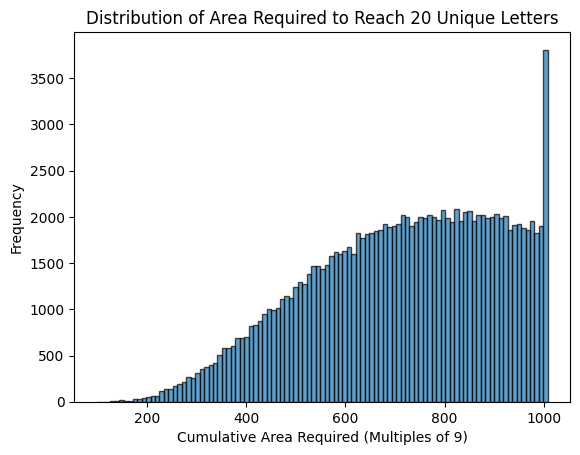

Most Frequent Area: 819

Top 5 most frequent valid areas:
Area: 819, Frequency: 2086
Area: 792, Frequency: 2071
Area: 846, Frequency: 2065
Area: 837, Frequency: 2053
Area: 900, Frequency: 2032

Average frequency of each letter when area = 819:
A: 899.9504 
B: 673.3900 
C: 506.6120 
D: 378.7541 
E: 286.5999 
F: 215.7738 
G: 162.1603 
H: 118.8288 
I: 89.8243 
J: 67.5923 
K: 49.8259 
L: 38.9710 
M: 28.1557 
N: 20.6796 
O: 17.1653 
P: 12.7702 
Q: 9.9464 
R: 8.8181 
S: 7.5115 
T: 6.6705 


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

def run_simulation(matrix, get_non_overlapping_grid, iterations=1000, max_area=1000):
    """Runs the simulation to track area required to reach 20 unique letters and compute letter frequencies.

    Args:
        matrix (np.array): The letter grid.
        get_non_overlapping_grid (function): Function to generate non-overlapping grid positions.
        iterations (int): Number of times to run the simulation.
        max_area (int): Maximum allowable area before discarding a trial.

    Returns:
        int: The most frequent area value.
        dict: Average frequency of each letter for the most frequent area.
        list: Top 5 most frequent valid areas.
    """
    area_counts = []
    letter_frequencies = defaultdict(list)  # Stores weighted frequencies per iteration

    successful_iterations = 0  # Count successful cases where 20 unique letters were reached

    for _ in range(iterations):
        unique_letters = set()
        letter_count = Counter()
        used_positions = set()
        area = 0

        while len(unique_letters) < 20 and area < max_area:
            grid_positions = get_non_overlapping_grid(used_positions)

            if not grid_positions:  # Prevent infinite loop if no valid positions are left
                break

            shuffled_positions = list(grid_positions)
            np.random.shuffle(shuffled_positions)

            for r, c in shuffled_positions:
                letter = matrix[r, c]
                unique_letters.add(letter)
                letter_count[letter] += 1
                used_positions.add((r, c))

            area += 9  # Increment area once per grid

        if len(unique_letters) == 20:  # Only count successful cases
            area_counts.append(area)
            successful_iterations += 1

            # Compute weighted frequency for each letter
            frequency_factor = 3600 / area
            for letter, count in letter_count.items():
                letter_frequencies[letter].append(count * frequency_factor)

    if successful_iterations == 0:
        raise ValueError("No successful iterations reached 20 unique letters within the max area limit.")

    # Compute valid area frequency (only multiples of 9)
    valid_area_counts = [a for a in area_counts if a % 9 == 0]
    area_counter = Counter(valid_area_counts)
    
    # Get the most frequent area
    most_frequent_area, _ = area_counter.most_common(1)[0]

    # Compute average frequency of each letter
    avg_letter_frequency = {
        letter: sum(frequencies) / len(frequencies) if frequencies else 0
        for letter, frequencies in letter_frequencies.items()
    }

    return most_frequent_area, avg_letter_frequency, area_counter.most_common(5), area_counts

# Example usage
matrix = np.array(matrix)  # Ensure matrix is a NumPy array
most_frequent_area, avg_letter_frequency, top_5_areas, area_counts = run_simulation(matrix, get_non_overlapping_grid, iterations=250000)

# Plot histogram of cumulative area required
plt.hist(area_counts, bins=range(min(area_counts), max(area_counts) + 9, 9), edgecolor='black', alpha=0.7)
plt.xlabel('Cumulative Area Required (Multiples of 9)')
plt.ylabel('Frequency')
plt.title('Distribution of Area Required to Reach 20 Unique Letters')
plt.show()

# Display most frequent area and top 5 frequent areas
print(f"Most Frequent Area: {most_frequent_area}")

print("\nTop 5 most frequent valid areas:")
for area, freq in top_5_areas:
    print(f"Area: {area}, Frequency: {freq}")

# Display average frequency per letter for the most frequent area
print(f"\nAverage frequency of each letter when area = {most_frequent_area}:")
for letter, avg_freq in sorted(avg_letter_frequency.items()):
    #print(f"{avg_freq:.4f} \n")
    print(f"{letter}: {avg_freq:.4f} ")


In [4]:
from scipy.stats import chi2

df = 19
chi_square_value = 1.170311407
p_value = 1 - chi2.cdf(chi_square_value, df)
print(f"P-value: {p_value}")


P-value: 0.9999999967982564


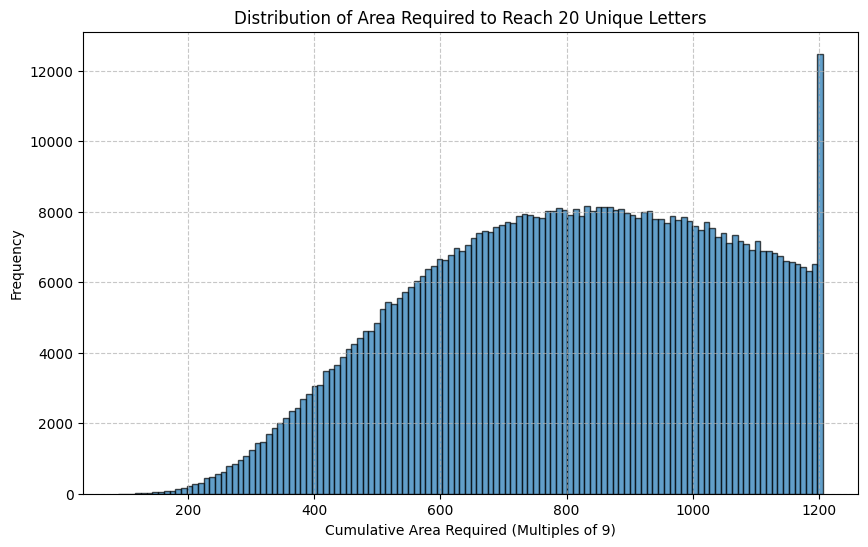

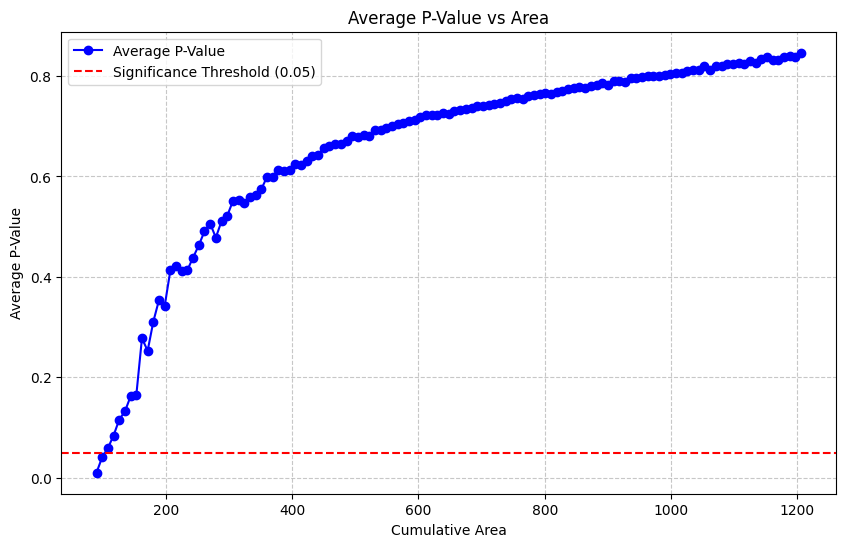

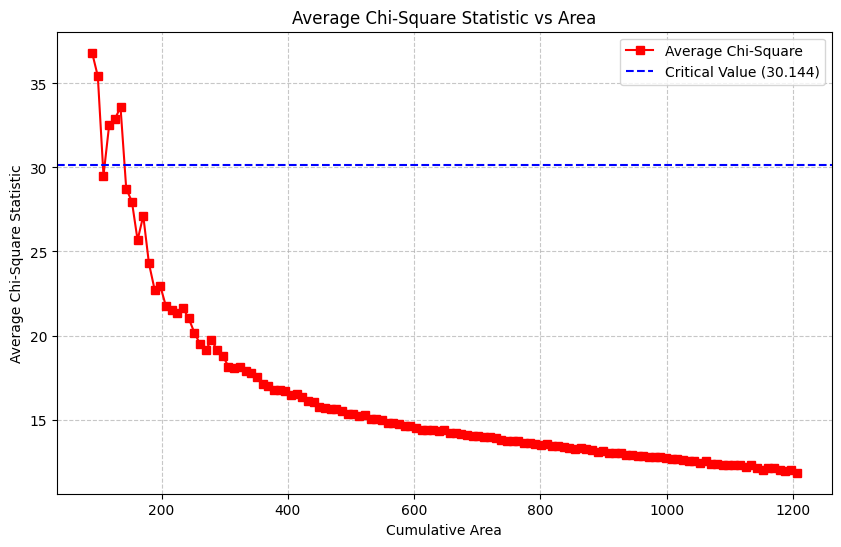

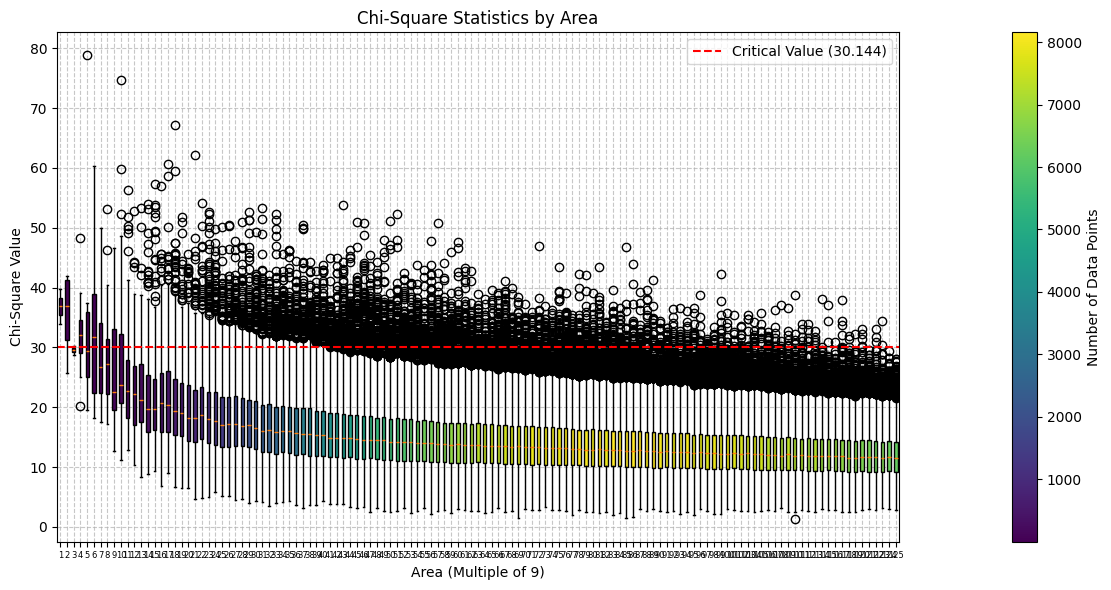

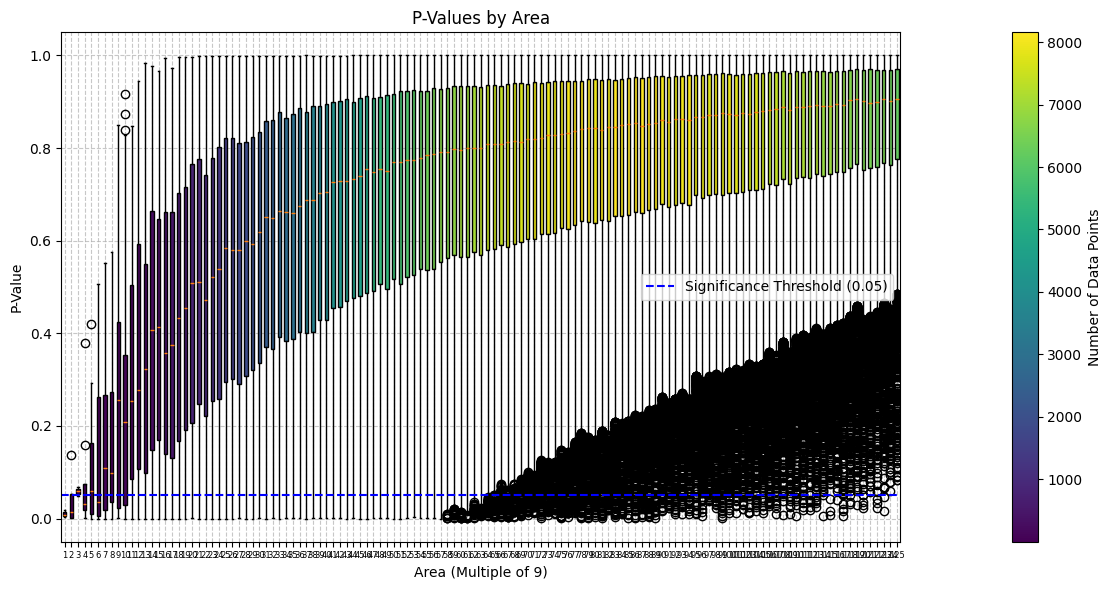


Copy-Paste into Python:
p_values_array = array([0.01018357, 0.04123571, 0.05903326, 0.08415142, 0.11589156,
       0.13219476, 0.16221639, 0.16397309, 0.27791281, 0.25294817,
       0.31107208, 0.35410227, 0.34241726, 0.41295031, 0.42082468,
       0.41141476, 0.41388037, 0.4386375 , 0.46285757, 0.49075124,
       0.50630173, 0.47831803, 0.5107544 , 0.52150038, 0.55082154,
       0.55229957, 0.54786321, 0.55928966, 0.56345978, 0.57457801,
       0.59874053, 0.59991297, 0.61241672, 0.61080466, 0.61236642,
       0.62512343, 0.62241001, 0.63045727, 0.64058608, 0.64341044,
       0.65717553, 0.66045661, 0.6651155 , 0.66465758, 0.67153316,
       0.67999721, 0.67778258, 0.68279277, 0.68010275, 0.69190892,
       0.69250963, 0.69598167, 0.70142892, 0.70536552, 0.70705877,
       0.70993343, 0.71266241, 0.71780999, 0.72280584, 0.72191087,
       0.72200966, 0.7266527 , 0.72355641, 0.73103405, 0.73276612,
       0.73468034, 0.73693249, 0.73939144, 0.73958333, 0.74288119,
       0.74379071, 0

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from scipy.stats import chisquare
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def run_simulation(matrix, get_non_overlapping_grid, iterations=1000, max_area=1200):
    """Runs the simulation to track area required to reach 20 unique letters, compute letter frequencies,
    and perform chi-square tests to obtain p-values for different areas."""
    area_counts = []
    letter_frequencies = defaultdict(list)
    p_value_records = defaultdict(list)
    chi2_records = defaultdict(list)

    successful_iterations = 0

    # Define expected frequencies for letters A-T
    expected_frequencies_base = np.array([902, 677, 508, 381, 286, 214, 161, 121, 90, 68, 
                                       51, 38, 29, 21, 16, 12, 9, 7, 5, 4])  # A to T

    for _ in range(iterations):
        unique_letters = set()
        letter_count = Counter()
        used_positions = set()
        area = 0

        while len(unique_letters) < 20 and area < max_area:
            grid_positions = get_non_overlapping_grid(used_positions)
            if not grid_positions:
                break
            shuffled_positions = list(grid_positions)
            np.random.shuffle(shuffled_positions)
            for r, c in shuffled_positions:
                letter = matrix[r, c]
                unique_letters.add(letter)
                letter_count[letter] += 1
                used_positions.add((r, c))
            area += 9

        if len(unique_letters) == 20:
            area_counts.append(area)
            successful_iterations += 1
            observed_frequencies = np.array([letter_count.get(chr(65 + i), 0) for i in range(20)])
            expected_frequencies = expected_frequencies_base * (np.sum(observed_frequencies) / np.sum(expected_frequencies_base))
            chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)
            p_value_records[area].append(p_value)
            chi2_records[area].append(chi2_stat)
            frequency_factor = 3600 / area
            for letter, count in letter_count.items():
                letter_frequencies[letter].append(count * frequency_factor)

    if successful_iterations == 0:
        raise ValueError("No successful iterations reached 20 unique letters within the max area limit.")

    return p_value_records, chi2_records, area_counts

# Define a fixed matrix (example with weighted distribution)
# Approximate letter frequencies to match expected_frequencies_base
letter_probs = np.array([902, 677, 508, 381, 286, 214, 161, 121, 90, 68, 
                                       51, 38, 29, 21, 16, 12, 9, 7, 5, 4])
letter_probs = letter_probs / letter_probs.sum()  # Normalize to probabilities
letters = [chr(65 + i) for i in range(20)]  # A to T
  # 60x60 matrix with weighted letters

def get_non_overlapping_grid(used_positions):
    while True:
        r, c = np.random.randint(0, 58), np.random.randint(0, 58)
        grid = {(r+i, c+j) for i in range(3) for j in range(3)}
        if not grid & used_positions:
            return grid

# Run simulation
p_value_records, chi2_records, area_counts = run_simulation(matrix, get_non_overlapping_grid, iterations=1000000)

# Plot histogram of area counts
plt.figure(figsize=(10, 6))
plt.hist(area_counts, bins=range(min(area_counts), max(area_counts) + 9, 9), edgecolor='black', alpha=0.7)
plt.xlabel('Cumulative Area Required (Multiples of 9)')
plt.ylabel('Frequency')
plt.title('Distribution of Area Required to Reach 20 Unique Letters')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Prepare data for plots
areas_sorted = sorted(p_value_records.keys())
p_values_sorted = [np.mean(p_value_records[area]) for area in areas_sorted]
chi2_values_sorted = [np.mean(chi2_records[area]) for area in areas_sorted]
p_value_data = [p_value_records[area] for area in areas_sorted]
chi2_data = [chi2_records[area] for area in areas_sorted]
counts_per_area = [len(p_value_records[area]) for area in areas_sorted]

# Simplify x-axis labels (multiples of 9 as 1, 2, 3, ...)
area_labels = [str(i + 1) for i, area in enumerate(areas_sorted)]

# Plot p-value vs area (line plot)
plt.figure(figsize=(10, 6))
plt.plot(areas_sorted, p_values_sorted, marker='o', linestyle='-', color='blue', label='Average P-Value')
plt.xlabel('Cumulative Area')
plt.ylabel('Average P-Value')
plt.title('Average P-Value vs Area')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.legend()
plt.show()

# Plot chi-square statistic vs area (line plot)
plt.figure(figsize=(10, 6))
plt.plot(areas_sorted, chi2_values_sorted, marker='s', linestyle='-', color='red', label='Average Chi-Square')
plt.xlabel('Cumulative Area')
plt.ylabel('Average Chi-Square Statistic')
plt.title('Average Chi-Square Statistic vs Area')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(30.144, color='b', linestyle='--', label='Critical Value (30.144)')
plt.legend()
plt.show()

# Normalize counts for color mapping
norm = Normalize(vmin=min(counts_per_area), vmax=max(counts_per_area))
cmap = plt.get_cmap('viridis')
colors = [cmap(norm(count)) for count in counts_per_area]

# Box plot for chi-square statistics
fig, ax1 = plt.subplots(figsize=(12, 6))
bp1 = ax1.boxplot(chi2_data, vert=True, patch_artist=True, tick_labels=area_labels)
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_xlabel('Area (Multiple of 9)')
ax1.set_ylabel('Chi-Square Value')
ax1.set_title('Chi-Square Statistics by Area')
plt.xticks(fontsize=6)  # Adjust x-axis label font size
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.axhline(30.144, color='r', linestyle='--', label='Critical Value (30.144)')
ax1.legend()
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1, orientation='vertical', label='Number of Data Points', pad=0.1)
plt.tight_layout()
plt.show()

# Box plot for p-values
fig, ax2 = plt.subplots(figsize=(12, 6))
bp2 = ax2.boxplot(p_value_data, vert=True, patch_artist=True, tick_labels=area_labels)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_xlabel('Area (Multiple of 9)')
ax2.set_ylabel('P-Value')
ax2.set_title('P-Values by Area')
plt.xticks(fontsize=6)  # Adjust x-axis label font size
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.axhline(0.05, color='b', linestyle='--', label='Significance Threshold (0.05)')
ax2.legend()
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax2, orientation='vertical', label='Number of Data Points', pad=0.1)
plt.tight_layout()
plt.show()

# Convert p-values and chi-square values to sorted arrays
p_values_array = np.array(p_values_sorted)
chi2_values_array = np.array(chi2_values_sorted)
area_array = np.array(areas_sorted)

# Print in NumPy array format
print("\nCopy-Paste into Python:")
print("p_values_array =", repr(p_values_array))
print("chi2_values_array =", repr(chi2_values_array))
print("area_array =", repr(area_array))

# Print counts per area for reference
print("\nNumber of Data Points per Area:")
for area, count in zip(areas_sorted, counts_per_area):
    print(f"Area {area}: {count} data points")

# Additional code for p-values from average chi-square
from scipy.stats import chi2
avg_chi2_to_p = [1 - chi2.cdf(chi2_avg, 19) for chi2_avg in chi2_values_sorted]
print("\nComparison of P-Values:")
print("Area | Avg P-Value (Approach 2) | P from Avg Chi² (Approach 1)")
print("-" * 60)
for area, avg_p, p_from_chi2 in zip(areas_sorted, p_values_sorted, avg_chi2_to_p):
    print(f"{area:4d} | {avg_p:.4f}                  | {p_from_chi2:.4f}")
p_from_avg_chi2_array = np.array(avg_chi2_to_p)
print("\nAdditional Array for Later Use:")
print("p_from_avg_chi2_array =", repr(p_from_avg_chi2_array))


Chi-square reaches 30.144 at area: Quad = None, Cubic = 22.538763377878258, Quartic = 74.69743313824523, Quintic = 92.64784685129705
p-value reaches 0.05 at area: Quad = None, Cubic = 21.627624134751283, Quartic = 68.87731960127593, Quintic = 83.8991732801266
R² Chi-square: Quad = 0.9519, Cubic = 0.9892, Quartic = 0.9961, Quintic = 0.9969
R² p-value: Quad = 0.9643, Cubic = 0.9926, Quartic = 0.9969, Quintic = 0.9973

Best Chi-square Fit: Quintic (R² = 0.9969)
Equation: -0.000000x⁵ + 0.000000x⁴ + -0.000000x³ + 0.000332x² + -0.143925x + 40.928483
Best p-value Fit: Quintic (R² = 0.9973)
Equation: 0.000000x⁵ + -0.000000x⁴ + 0.000000x³ + -0.000011x² + 0.005207x + -0.315127

Chi-square Equations:
Quadratic: 0.000013x² + -0.026028x + 25.745267
Cubic: -0.000000x³ + 0.000066x² + -0.058937x + 31.439058
Quartic: 0.000000x⁴ + -0.000000x³ + 0.000179x² + -0.102075x + 36.828336
Quintic: -0.000000x⁵ + 0.000000x⁴ + -0.000000x³ + 0.000332x² + -0.143925x + 40.928483

p-value Equations:
Quadratic: -0.0000

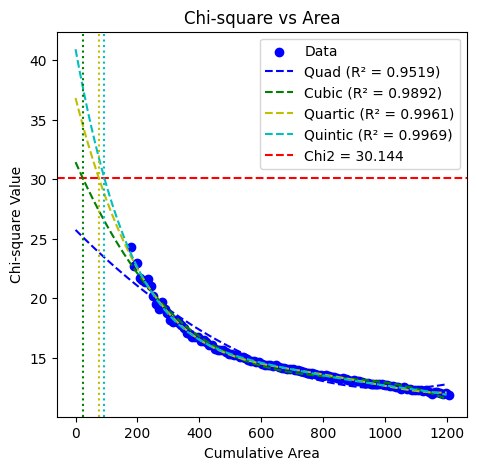

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

p_values_array = np.array([
       0.31107208, 0.35410227, 0.34241726, 0.41295031, 0.42082468,
       0.41141476, 0.41388037, 0.4386375 , 0.46285757, 0.49075124,
       0.50630173, 0.47831803, 0.5107544 , 0.52150038, 0.55082154,
       0.55229957, 0.54786321, 0.55928966, 0.56345978, 0.57457801,
       0.59874053, 0.59991297, 0.61241672, 0.61080466, 0.61236642,
       0.62512343, 0.62241001, 0.63045727, 0.64058608, 0.64341044,
       0.65717553, 0.66045661, 0.6651155 , 0.66465758, 0.67153316,
       0.67999721, 0.67778258, 0.68279277, 0.68010275, 0.69190892,
       0.69250963, 0.69598167, 0.70142892, 0.70536552, 0.70705877,
       0.70993343, 0.71266241, 0.71780999, 0.72280584, 0.72191087,
       0.72200966, 0.7266527 , 0.72355641, 0.73103405, 0.73276612,
       0.73468034, 0.73693249, 0.73939144, 0.73958333, 0.74288119,
       0.74379071, 0.74651362, 0.75072096, 0.75390643, 0.75631922,
       0.75500404, 0.76040998, 0.7630797 , 0.76478259, 0.76641129,
       0.76467342, 0.7677022 , 0.77045413, 0.77338658, 0.77585074,
       0.77838431, 0.77538463, 0.77963618, 0.7819768 , 0.78641105,
       0.78232314, 0.7895356 , 0.7895265 , 0.78893729, 0.79548106,
       0.79665749, 0.798726  , 0.79991838, 0.80065151, 0.80076669,
       0.80181808, 0.80399312, 0.80590462, 0.80674937, 0.80921469,
       0.81174186, 0.81263734, 0.81896626, 0.81293397, 0.81985737,
       0.82061077, 0.82304463, 0.82406371, 0.82492595, 0.8244029 ,
       0.82892704, 0.82532441, 0.83327286, 0.83837029, 0.8320468 ,
       0.83219176, 0.83702978, 0.84056448, 0.83742292, 0.84636496])
chi2_values_array = np.array([
       24.28454933, 22.7307171 , 22.94235117, 21.72932329, 21.53296187,
       21.35718927, 21.61815455, 21.02257689, 20.16048974, 19.48829557,
       19.13311213, 19.72928839, 19.13860861, 18.79253635, 18.14353435,
       18.04619975, 18.14222431, 17.88871741, 17.78073626, 17.53737288,
       17.0871609 , 16.97852422, 16.76637662, 16.74723336, 16.71995917,
       16.43071931, 16.52406921, 16.31798302, 16.09890956, 16.0515787 ,
       15.7510321 , 15.67792456, 15.61520649, 15.628944  , 15.47909177,
       15.31185721, 15.34712704, 15.23384211, 15.24757062, 15.04599737,
       15.02610106, 14.96314414, 14.80095561, 14.77034938, 14.70506384,
       14.62925531, 14.62676938, 14.48975877, 14.38839271, 14.40043395,
       14.39544114, 14.30344427, 14.38415127, 14.21363122, 14.17864528,
       14.16714426, 14.09647981, 14.04164167, 14.0333159 , 13.97377189,
       13.93486788, 13.91405472, 13.8023221 , 13.73103737, 13.71321842,
       13.73255831, 13.61798698, 13.58743953, 13.51701971, 13.47397204,
       13.54533328, 13.45453731, 13.41259134, 13.35748273, 13.29499749,
       13.24883695, 13.31713723, 13.22068429, 13.1610895 , 13.08576789,
       13.14807506, 13.00847746, 13.01672831, 13.00771263, 12.90006523,
       12.88538994, 12.82464281, 12.80084644, 12.78020221, 12.77860088,
       12.79182877, 12.70534872, 12.67813429, 12.64838021, 12.59274242,
       12.53632474, 12.53453467, 12.39957756, 12.54624574, 12.36949786,
       12.37041316, 12.31502626, 12.27305374, 12.26971359, 12.31933305,
       12.19150118, 12.28651593, 12.08802521, 11.98063716, 12.11762004,
       12.10182556, 12.02449662, 11.94311941, 12.02516612, 11.83549291])
area_array = np.array([   180,
        189,  198,  207,  216,  225,  234,  243,  252,  261,  270,  279,
        288,  297,  306,  315,  324,  333,  342,  351,  360,  369,  378,
        387,  396,  405,  414,  423,  432,  441,  450,  459,  468,  477,
        486,  495,  504,  513,  522,  531,  540,  549,  558,  567,  576,
        585,  594,  603,  612,  621,  630,  639,  648,  657,  666,  675,
        684,  693,  702,  711,  720,  729,  738,  747,  756,  765,  774,
        783,  792,  801,  810,  819,  828,  837,  846,  855,  864,  873,
        882,  891,  900,  909,  918,  927,  936,  945,  954,  963,  972,
        981,  990,  999, 1008, 1017, 1026, 1035, 1044, 1053, 1062, 1071,
       1080, 1089, 1098, 1107, 1116, 1125, 1134, 1143, 1152, 1161, 1170,
       1179, 1188, 1197, 1206])


# Define polynomial functions
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

def cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def quartic(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

def quintic(x, a, b, c, d, e, f):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f

# Fit curves
params_chi2_quad, _ = curve_fit(quadratic, area_array, chi2_values_array)
params_chi2_cubic, _ = curve_fit(cubic, area_array, chi2_values_array)
params_chi2_quartic, _ = curve_fit(quartic, area_array, chi2_values_array)
params_chi2_quintic, _ = curve_fit(quintic, area_array, chi2_values_array)

params_pval_quad, _ = curve_fit(quadratic, area_array, p_values_array)
params_pval_cubic, _ = curve_fit(cubic, area_array, p_values_array)
params_pval_quartic, _ = curve_fit(quartic, area_array, p_values_array)
params_pval_quintic, _ = curve_fit(quintic, area_array, p_values_array)

# Evaluate fits
chi2_quad_fit = quadratic(area_array, *params_chi2_quad)
chi2_cubic_fit = cubic(area_array, *params_chi2_cubic)
chi2_quartic_fit = quartic(area_array, *params_chi2_quartic)
chi2_quintic_fit = quintic(area_array, *params_chi2_quintic)

pval_quad_fit = quadratic(area_array, *params_pval_quad)
pval_cubic_fit = cubic(area_array, *params_pval_cubic)
pval_quartic_fit = quartic(area_array, *params_pval_quartic)
pval_quintic_fit = quintic(area_array, *params_pval_quintic)

# R² scores
r2_chi2_quad = r2_score(chi2_values_array, chi2_quad_fit)
r2_chi2_cubic = r2_score(chi2_values_array, chi2_cubic_fit)
r2_chi2_quartic = r2_score(chi2_values_array, chi2_quartic_fit)
r2_chi2_quintic = r2_score(chi2_values_array, chi2_quintic_fit)

r2_pval_quad = r2_score(p_values_array, pval_quad_fit)
r2_pval_cubic = r2_score(p_values_array, pval_cubic_fit)
r2_pval_quartic = r2_score(p_values_array, pval_quartic_fit)
r2_pval_quintic = r2_score(p_values_array, pval_quintic_fit)

# Solve for thresholds
chi2_target = 30.144  # Critical value for 19 df at alpha = 0.05
pval_target = 0.05    # Significance threshold

# Roots for each fit
chi2_quad_roots = np.roots([params_chi2_quad[0], params_chi2_quad[1], params_chi2_quad[2] - chi2_target])
chi2_cubic_roots = np.roots([params_chi2_cubic[0], params_chi2_cubic[1], params_chi2_cubic[2], params_chi2_cubic[3] - chi2_target])
chi2_quartic_roots = np.roots([params_chi2_quartic[0], params_chi2_quartic[1], params_chi2_quartic[2], params_chi2_quartic[3], params_chi2_quartic[4] - chi2_target])
chi2_quintic_roots = np.roots([params_chi2_quintic[0], params_chi2_quintic[1], params_chi2_quintic[2], params_chi2_quintic[3], params_chi2_quintic[4], params_chi2_quintic[5] - chi2_target])

pval_quad_roots = np.roots([params_pval_quad[0], params_pval_quad[1], params_pval_quad[2] - pval_target])
pval_cubic_roots = np.roots([params_pval_cubic[0], params_pval_cubic[1], params_pval_cubic[2], params_pval_cubic[3] - pval_target])
pval_quartic_roots = np.roots([params_pval_quartic[0], params_pval_quartic[1], params_pval_quartic[2], params_pval_quartic[3], params_pval_quartic[4] - pval_target])
pval_quintic_roots = np.roots([params_pval_quintic[0], params_pval_quintic[1], params_pval_quintic[2], params_pval_quintic[3], params_pval_quintic[4], params_pval_quintic[5] - pval_target])

# Filter valid roots
def get_valid_root(roots, min_area=0, max_area=1200):
    real_roots = roots[np.isreal(roots)].real
    valid_roots = real_roots[(real_roots >= min_area) & (real_roots <= max_area)]
    return valid_roots[0] if valid_roots.size > 0 else None

chi2_quad_area = get_valid_root(chi2_quad_roots)
chi2_cubic_area = get_valid_root(chi2_cubic_roots)
chi2_quartic_area = get_valid_root(chi2_quartic_roots)
chi2_quintic_area = get_valid_root(chi2_quintic_roots)

pval_quad_area = get_valid_root(pval_quad_roots)
pval_cubic_area = get_valid_root(pval_cubic_roots)
pval_quartic_area = get_valid_root(pval_quartic_roots)
pval_quintic_area = get_valid_root(pval_quintic_roots)

# Extended area for plotting
extended_area = np.linspace(0, 1200, 1200)
chi2_quad_extended = quadratic(extended_area, *params_chi2_quad)
chi2_cubic_extended = cubic(extended_area, *params_chi2_cubic)
chi2_quartic_extended = quartic(extended_area, *params_chi2_quartic)
chi2_quintic_extended = quintic(extended_area, *params_chi2_quintic)

pval_quad_extended = quadratic(extended_area, *params_pval_quad)
pval_cubic_extended = cubic(extended_area, *params_pval_cubic)
pval_quartic_extended = quartic(extended_area, *params_pval_quartic)
pval_quintic_extended = quintic(extended_area, *params_pval_quintic)

# Determine best fit (highest R²)
chi2_fits = [
    ('Quadratic', r2_chi2_quad, params_chi2_quad),
    ('Cubic', r2_chi2_cubic, params_chi2_cubic),
    ('Quartic', r2_chi2_quartic, params_chi2_quartic),
    ('Quintic', r2_chi2_quintic, params_chi2_quintic)
]
pval_fits = [
    ('Quadratic', r2_pval_quad, params_pval_quad),
    ('Cubic', r2_pval_cubic, params_pval_cubic),
    ('Quartic', r2_pval_quartic, params_pval_quartic),
    ('Quintic', r2_pval_quintic, params_pval_quintic)
]
chi2_best_fit = max(chi2_fits, key=lambda x: x[1])
pval_best_fit = max(pval_fits, key=lambda x: x[1])

# Format equations
def format_equation(name, params, decimals=6):
    if name == 'Quadratic':
        return f"{params[0]:.6f}x² + {params[1]:.6f}x + {params[2]:.6f}"
    elif name == 'Cubic':
        return f"{params[0]:.6f}x³ + {params[1]:.6f}x² + {params[2]:.6f}x + {params[3]:.6f}"
    elif name == 'Quartic':
        return f"{params[0]:.6f}x⁴ + {params[1]:.6f}x³ + {params[2]:.6f}x² + {params[3]:.6f}x + {params[4]:.6f}"
    elif name == 'Quintic':
        return f"{params[0]:.6f}x⁵ + {params[1]:.6f}x⁴ + {params[2]:.6f}x³ + {params[3]:.6f}x² + {params[4]:.6f}x + {params[5]:.6f}"

# Plotting (3 subplots)
plt.figure(figsize=(18, 5))

# Chi-square plot
plt.subplot(1, 3, 1)
plt.scatter(area_array, chi2_values_array, color="blue", label="Data")
plt.plot(extended_area, chi2_quad_extended, 'b--', label=f"Quad (R² = {r2_chi2_quad:.4f})")
plt.plot(extended_area, chi2_cubic_extended, 'g--', label=f"Cubic (R² = {r2_chi2_cubic:.4f})")
plt.plot(extended_area, chi2_quartic_extended, 'y--', label=f"Quartic (R² = {r2_chi2_quartic:.4f})")
plt.plot(extended_area, chi2_quintic_extended, 'c--', label=f"Quintic (R² = {r2_chi2_quintic:.4f})")
plt.axhline(chi2_target, color='r', linestyle='--', label=f"Chi2 = {chi2_target}")
if chi2_quad_area:
    plt.axvline(chi2_quad_area, color='b', linestyle=':', label=f"Quad Area = {chi2_quad_area:.2f}")
if chi2_cubic_area:
    plt.axvline(chi2_cubic_area, color='g', linestyle=':')
if chi2_quartic_area:
    plt.axvline(chi2_quartic_area, color='y', linestyle=':')
if chi2_quintic_area:
    plt.axvline(chi2_quintic_area, color='c', linestyle=':')
plt.xlabel("Cumulative Area")
plt.ylabel("Chi-square Value")
plt.title("Chi-square vs Area")
plt.legend()

# # P-value plot
# plt.subplot(1, 3, 2)
# plt.scatter(area_array, p_values_array, color="red", label="Data")
# plt.plot(extended_area, pval_quad_extended, 'r--', label=f"Quad (R² = {r2_pval_quad:.4f})")
# plt.plot(extended_area, pval_cubic_extended, 'm--', label=f"Cubic (R² = {r2_pval_cubic:.4f})")
# plt.plot(extended_area, pval_quartic_extended, 'c--', label=f"Quartic (R² = {r2_pval_quartic:.4f})")
# plt.plot(extended_area, pval_quintic_extended, 'y--', label=f"Quintic (R² = {r2_pval_quintic:.4f})")
# plt.axhline(pval_target, color='b', linestyle='--', label=f"p-value = {pval_target}")
# if pval_quad_area:
#     plt.axvline(pval_quad_area, color='r', linestyle=':', label=f"Quad Area = {pval_quad_area:.2f}")
# if pval_cubic_area:
#     plt.axvline(pval_cubic_area, color='m', linestyle=':')
# if pval_quartic_area:
#     plt.axvline(pval_quartic_area, color='c', linestyle=':')
# if pval_quintic_area:
#     plt.axvline(pval_quintic_area, color='y', linestyle=':')
# plt.xlabel("Cumulative Area")
# plt.ylabel("P-Value")
# plt.title("P-Value vs Area")
# plt.legend()
# plt.show()

# Print results
print(f"\nChi-square reaches {chi2_target} at area: Quad = {chi2_quad_area}, Cubic = {chi2_cubic_area}, Quartic = {chi2_quartic_area}, Quintic = {chi2_quintic_area}")
print(f"p-value reaches {pval_target} at area: Quad = {pval_quad_area}, Cubic = {pval_cubic_area}, Quartic = {pval_quartic_area}, Quintic = {pval_quintic_area}")
print(f"R² Chi-square: Quad = {r2_chi2_quad:.4f}, Cubic = {r2_chi2_cubic:.4f}, Quartic = {r2_chi2_quartic:.4f}, Quintic = {r2_chi2_quintic:.4f}")
print(f"R² p-value: Quad = {r2_pval_quad:.4f}, Cubic = {r2_pval_cubic:.4f}, Quartic = {r2_pval_quartic:.4f}, Quintic = {r2_pval_quintic:.4f}")
print(f"\nBest Chi-square Fit: {chi2_best_fit[0]} (R² = {chi2_best_fit[1]:.4f})")
print(f"Equation: {format_equation(chi2_best_fit[0], chi2_best_fit[2])}")
print(f"Best p-value Fit: {pval_best_fit[0]} (R² = {pval_best_fit[1]:.4f})")
print(f"Equation: {format_equation(pval_best_fit[0], pval_best_fit[2])}")
print(f"\nChi-square Equations:")
print(f"Quadratic: {format_equation('Quadratic', params_chi2_quad)}")
print(f"Cubic: {format_equation('Cubic', params_chi2_cubic)}")
print(f"Quartic: {format_equation('Quartic', params_chi2_quartic)}")
print(f"Quintic: {format_equation('Quintic', params_chi2_quintic)}")
print(f"\np-value Equations:")
print(f"Quadratic: {format_equation('Quadratic', params_pval_quad)}")
print(f"Cubic: {format_equation('Cubic', params_pval_cubic)}")
print(f"Quartic: {format_equation('Quartic', params_pval_quartic)}")
print(f"Quintic: {format_equation('Quintic', params_pval_quintic)}")
print(f"\nAveraged P-Value Array (fill this with your data):")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import r2_score

# Data
p_values_array = np.array([0.83971034, 0.70597367, 0.5916975 , 0.49998266, 0.42985127,
       0.37109301, 0.33105713, 0.28814381, 0.26795804, 0.23719164])
chi2_values_array = np.array([  12.97770663, 15.25940602, 16.97299389,
       18.33791523, 19.42566648, 20.39633066, 21.10447131, 21.92223082,
       22.33383791, 23.0034099 ])
area_array = np.array([45, 54, 63, 72, 81, 90, 99, 108, 117, 126])

# Fit polynomials up to degree N
max_degree = 5  # Change this to any degree
chi2_fits = []
pval_fits = []

for degree in range(2, max_degree + 1):
    # Fit polynomial
    chi2_coeffs = np.polyfit(area_array, chi2_values_array, degree)
    pval_coeffs = np.polyfit(area_array, p_values_array, degree)
    
    # Create polynomial objects (coefficients in ascending order)
    chi2_poly = Polynomial(chi2_coeffs[::-1])
    pval_poly = Polynomial(pval_coeffs[::-1])
    
    # Evaluate fit
    chi2_fit = chi2_poly(area_array)
    pval_fit = pval_poly(area_array)
    
    # R²
    r2_chi2 = r2_score(chi2_values_array, chi2_fit)
    r2_pval = r2_score(p_values_array, pval_fit)
    
    # Store results
    chi2_fits.append((f"Degree-{degree}", r2_chi2, chi2_poly))
    pval_fits.append((f"Degree-{degree}", r2_pval, pval_poly))

# Best fit
chi2_best_fit = max(chi2_fits, key=lambda x: x[1])
pval_best_fit = max(pval_fits, key=lambda x: x[1])

# Extended area
extended_area = np.linspace(45, 200, 100)

# Thresholds
chi2_target = 30.144  # Critical value for 19 df at alpha = 0.05
pval_target = 0.05    # Significance threshold

# Function to find valid root in range
def get_valid_root(poly, target, min_area=45, max_area=200):
    shifted_poly = poly - target  # Shift to find roots where poly = target
    roots = shifted_poly.roots()
    real_roots = roots[np.isreal(roots)].real
    valid_roots = real_roots[(real_roots >= min_area) & (real_roots <= max_area)]
    return valid_roots[0] if valid_roots.size > 0 else None

# Plotting
plt.figure(figsize=(12, 5))
colors = ['b', 'g', 'y', 'c', 'm', 'k', 'orange']  # Add more if max_degree > 7

# Chi-square plot
plt.subplot(1, 2, 1)
plt.scatter(area_array, chi2_values_array, color="blue", label="Data")
for i, (name, r2, poly) in enumerate(chi2_fits):
    plt.plot(extended_area, poly(extended_area), f'{colors[i]}--', label=f"{name} (R² = {r2:.4f})")
    root = get_valid_root(poly, chi2_target)
    if root:
        plt.axvline(root, color=colors[i], linestyle=':', label=f"{name} Area = {root:.2f}")
plt.axhline(chi2_target, color='r', linestyle='--', label=f"Chi2 = {chi2_target}")
plt.xlabel("Cumulative Area")
plt.ylabel("Chi-square Value")
plt.title("Chi-square vs Area")
plt.legend()

# P-value plot
plt.subplot(1, 2, 2)
plt.scatter(area_array, p_values_array, color="red", label="Data")
for i, (name, r2, poly) in enumerate(pval_fits):
    plt.plot(extended_area, poly(extended_area), f'{colors[i]}--', label=f"{name} (R² = {r2:.4f})")
    root = get_valid_root(poly, pval_target)
    if root:
        plt.axvline(root, color=colors[i], linestyle=':', label=f"{name} Area = {root:.2f}")
plt.axhline(pval_target, color='b', linestyle='--', label=f"p-value = {pval_target}")
plt.xlabel("Cumulative Area")
plt.ylabel("p-value")
plt.title("p-value vs Area")
plt.legend()

plt.tight_layout()
plt.show()

# Print results
print(f"Best Chi-square Fit: {chi2_best_fit[0]} (R² = {chi2_best_fit[1]:.4f})")
print(f"Equation: {chi2_best_fit[2]}")
print(f"Best p-value Fit: {pval_best_fit[0]} (R² = {pval_best_fit[1]:.4f})")
print(f"Equation: {pval_best_fit[2]}")
print("\nChi-square Equations and Thresholds:")
for name, r2, poly in chi2_fits:
    root = get_valid_root(poly, chi2_target)
    reaches = "Yes" if root else "No"
    area_str = f" at Area = {root:.2f}" if root else ""
    print(f"{name}: {poly}")
    print(f"  R² = {r2:.4f}, Reaches {chi2_target} = {reaches}{area_str}")
print("\np-value Equations and Thresholds:")
for name, r2, poly in pval_fits:
    root = get_valid_root(poly, pval_target)
    reaches = "Yes" if root else "No"
    area_str = f" at Area = {root:.2f}" if root else ""
    print(f"{name}: {poly}")
    print(f"  R² = {r2:.4f}, Reaches {pval_target} = {reaches}{area_str}")